# Training Metrics

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def gpus_mean(x,num_gpus=4):
    output = 0
    for i in range(num_gpus):
        output+=x[i::num_gpus]
    return output/num_gpus

# train losses

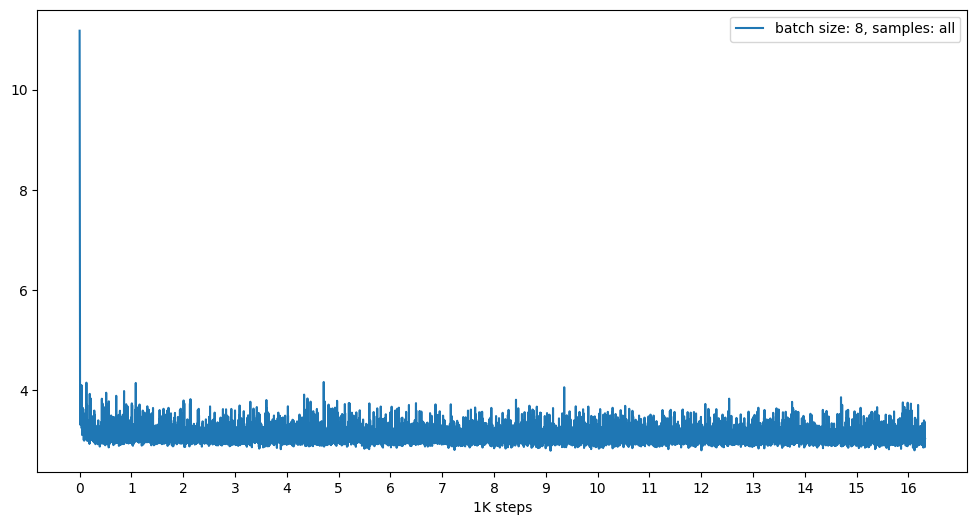

In [16]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


test = {
    "training_results/train-loss.txt": "batch size: 8, samples: all",
}

def plot_loss(test,view_total_loss,step_per_epoch,epoch_start=0):
    fig,ax=plt.subplots(1,1,figsize=(12,6))

    if view_total_loss: 
        for i,(file_name,description) in enumerate(test.items()):
            start = epoch_start*step_per_epoch[i] # epoch start
            f = open(file_name, "r")
            train_loss = gpus_mean(np.array([float(item) for item in f.read().split(',') if item]),num_gpus=1)
            ax.plot(train_loss[start:],label = description)
            ax.set_xticks(step_per_epoch[i]*np.arange(len(train_loss[start:])//(step_per_epoch[i])+1),[f'{start + i}' for i in range(len(train_loss[start:])//(step_per_epoch[i])+1)])
    plt.xlabel('1K steps')
    plt.legend()
    plt.show()

plot_loss(test,view_total_loss=True,step_per_epoch=[1000])
 
    